In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes=load_diabetes()

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
#checking the description of the dataset
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Prepairing the dataset

In [6]:
diab_df=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [7]:
diab_df['prog_disease']=diabetes.target

In [8]:
diab_df.isnull().sum()

age             0
sex             0
bmi             0
bp              0
s1              0
s2              0
s3              0
s4              0
s5              0
s6              0
prog_disease    0
dtype: int64

Hence the given dataset has no missing values

In [9]:
diab_df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog_disease
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [10]:
#STATS OF THE DATASET
diab_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog_disease
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


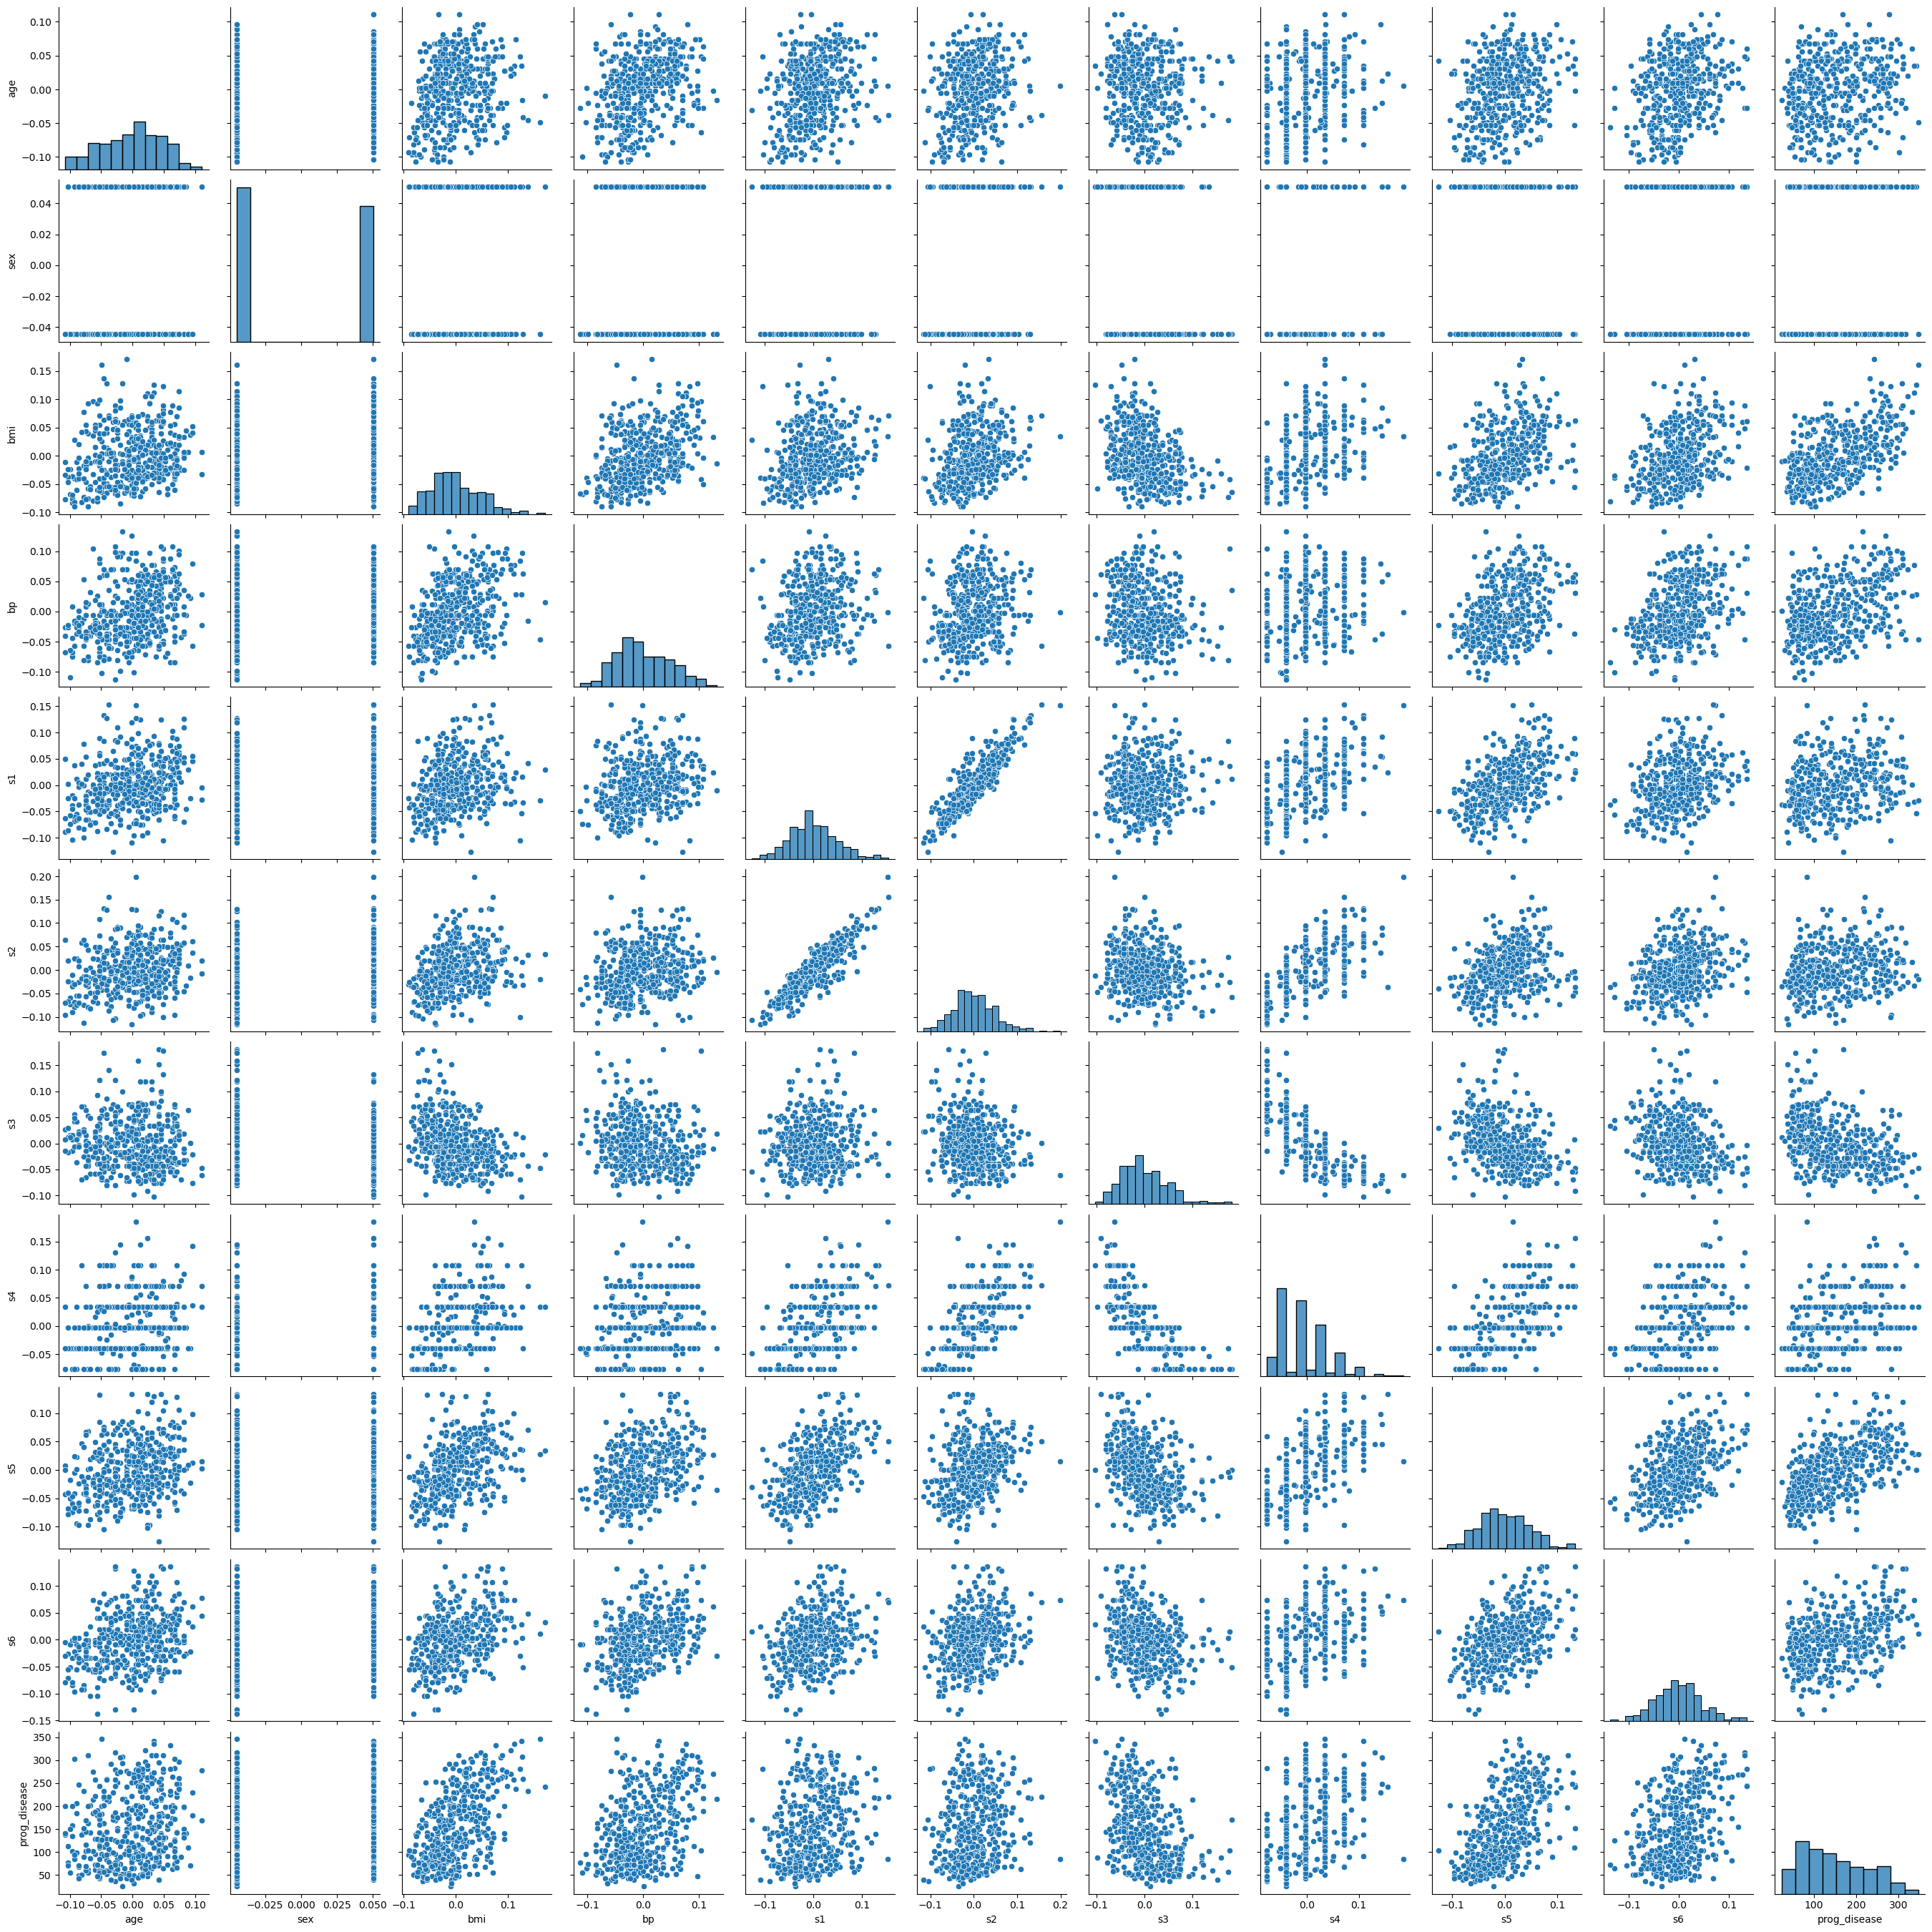

In [11]:
import seaborn as sns
sns.pairplot(diab_df)

Text(0, 0.5, 'progressed disease')

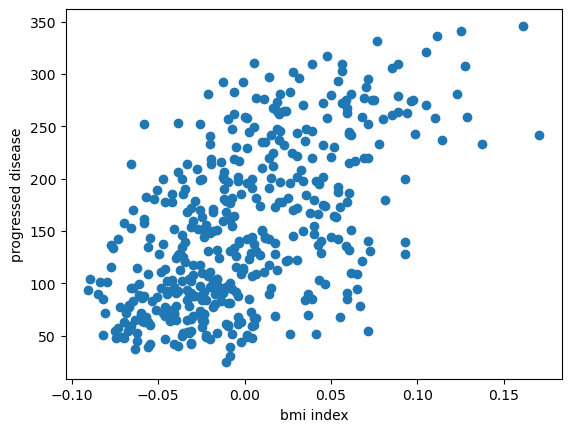

In [12]:
#out of all the above plots if u want to see just a specific scatter plot,then:-
plt.scatter(diab_df['bmi'], diab_df['prog_disease'])
plt.xlabel("bmi index")
plt.ylabel("progressed disease")

<Axes: xlabel='bmi', ylabel='prog_disease'>

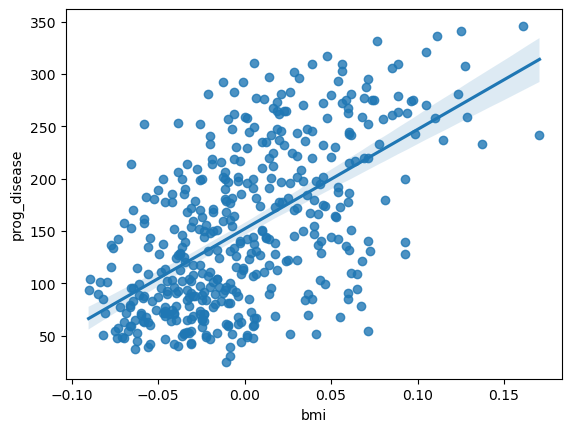

In [13]:
sns.regplot(x="bmi",y="prog_disease",data=diab_df)
#will draw the best fit line

In [14]:
#initializing dependent and independent variables
X=diabetes.data #we could also initialize it with "diab_df.iloc[:,:-1]",this selects all columns other than the last one(target)
y=diabetes.target #in this case diab_df.iloc[:,-1] can be used too

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [31]:
print("coefficient/slope:",regression.coef_)
print("intercept:",regression.intercept_)

coefficient/slope: [  1.35246724 -12.45426893  26.21004615  18.61443344 -43.26039442
  24.2556288    5.73862584  13.96342685  31.57521526   1.98339354]
intercept: 153.90291262135923


In [32]:
y_pred=regression.predict(X_test)

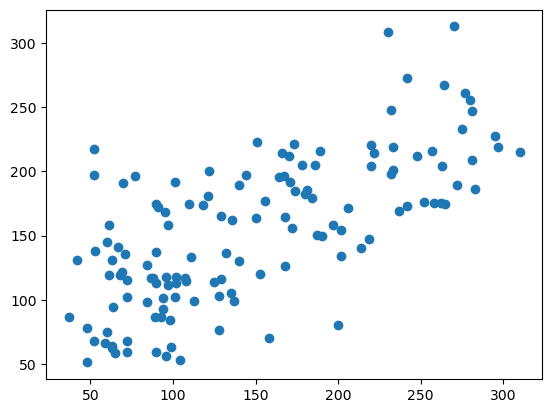

In [20]:
plt.scatter(y_test,y_pred)

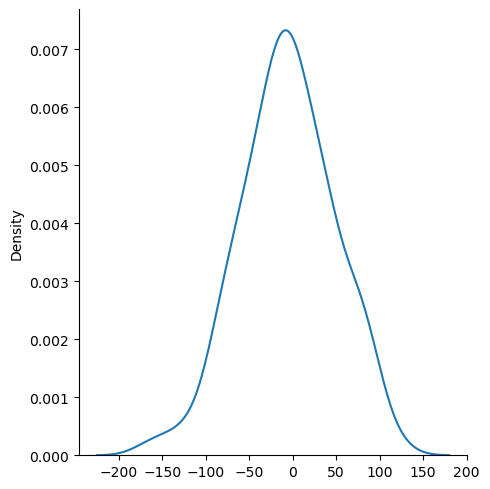

In [33]:
#presenting errors:-
residuals=y_test-y_pred
sns.displot(residuals,kind='kde') #kde-kernal density estimation is a probability density curve

In [34]:
#Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred) #because applying more than one performance metrics won't hurt.
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2872.0122769933646
42.423962687650324
53.59115857110541


In [35]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.46797915130536816


In [36]:
adjusted=1-((1-score)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)
adjusted

0.42437088501892295

# NEW DATA PREDICTION

In [38]:
regression.predict(scaler.transform(diabetes.data[0].reshape(1,-1)))

array([156.72428006])

# Pickling the model for deployment

In [39]:
#Pickling a model file refers to the process of serializing a ml model and saving it to a file in a binary format:-
import pickle
pickle.dump(regression,open("regmodel.pkl","wb"))
     #with open, we store the serialized data on the place with the given name,we write it on binary as specified by "wb"

In [42]:
pickled_model=pickle.load(open("regmodel.pkl","rb")) #since we are loading it so we will use rb(read byte)